# **Project: Avocado Prices**

## 1. Data Preprocessing

In [1]:
# import library
import pandas as pd
import numpy as np

# import library for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
dataset = pd.read_csv("./avocado.csv")

In [4]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [160]:
# Replace the Unnamed: 0 column with index
dataset.set_index(dataset['Unnamed: 0'], inplace=True)
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


- 4046: non-organic small/medium Hass Avocados (~3-5 oz)
- 4225: non-organic large Hass Avocados (~8-10 oz)
- 4770: non-organic extra large Hass Avocados (~10-15 oz)

## 2. Feature Classifcation: Categorical vs Numerical

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
# Checking if there any missing value
print(dataset.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


- There are no missing values.

In [5]:
# Change data type from object to category
features = ["type", "region", "year"]
def convert_cat(dataset, features):
    for feature in features: 
        dataset[feature] =dataset[feature].astype("category")
convert_cat(dataset, features)

In [161]:
# Convert Date into a date time object
dataset.Date = pd.to_datetime(dataset.Date)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  category      
 11  year          18249 non-null  category      
 12  region        18249 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(9)
memory usage: 2.1 MB


In [162]:
# Distribution of Numerical Value
dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
dataset.describe(include='category')

,type,year,region
count,18249,18249,18249
unique,2,4,54
top,conventional,2017,Albany
freq,9126,5722,338


In [163]:
# Seperate the Month, Week, Year in Date columns
dataset = dataset.assign(
    order_month = dataset.Date.dt.month_name(),
    order_week_of_the_year =  dataset.Date.dt.weekofyear,
    order_year = dataset.Date.dt.year
)

C:\Users\THAI2\AppData\Local\Temp\ipykernel_19344\3969988803.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [164]:
# Group months into season
def map_month_to_season(month_name):
    if month_name in ['March', 'April', 'May']:
        return 'Spring'
    elif month_name in ['June', 'July', 'August']:
        return 'Summer'
    elif month_name in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'

# apply the function to create a new column named 'season'
dataset['season'] = dataset['order_month'].apply(map_month_to_season)

In [ ]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,order_month,order_week_of_the_year,order_year,season
Unnamed: 0,,,,,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,52,2015,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,51,2015,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,50,2015,Winter
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,49,2015,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,48,2015,Autumn


In [ ]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,order_month,order_week_of_the_year,order_year
Unnamed: 0,,,,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,52,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,51,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,50,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,49,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,48,2015


## 3. Exploratory Data Analysis (EDA)

In [ ]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,order_month,order_week_of_the_year,order_year,season
Unnamed: 0,,,,,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,52,2015,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,51,2015,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,50,2015,Winter
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,49,2015,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,48,2015,Autumn


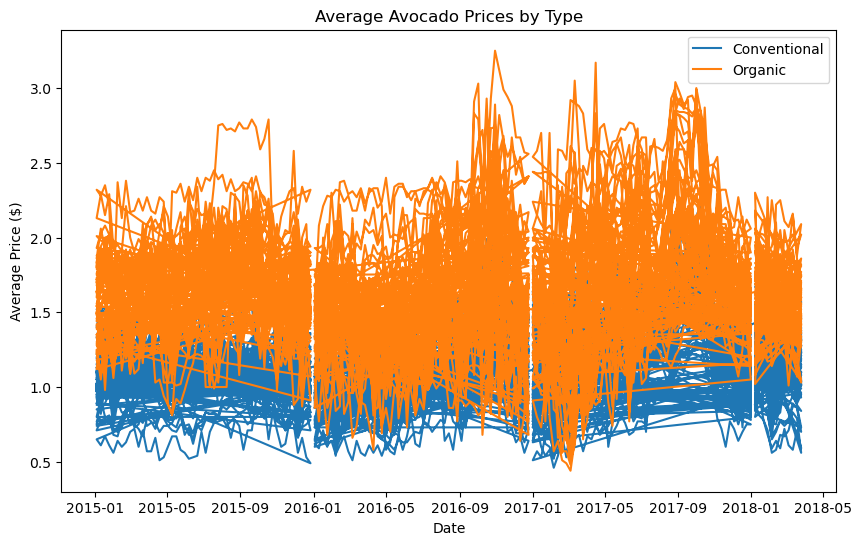

In [11]:
# Time series plot of average price over time
plt.figure(figsize=(10, 6))
plt.plot(dataset[dataset['type']=='conventional']['Date'], dataset[dataset['type']=='conventional']['AveragePrice'], label='Conventional')
plt.plot(dataset[dataset['type']=='organic']['Date'], dataset[dataset['type']=='organic']['AveragePrice'], label='Organic')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.title('Average Avocado Prices by Type')
plt.legend()

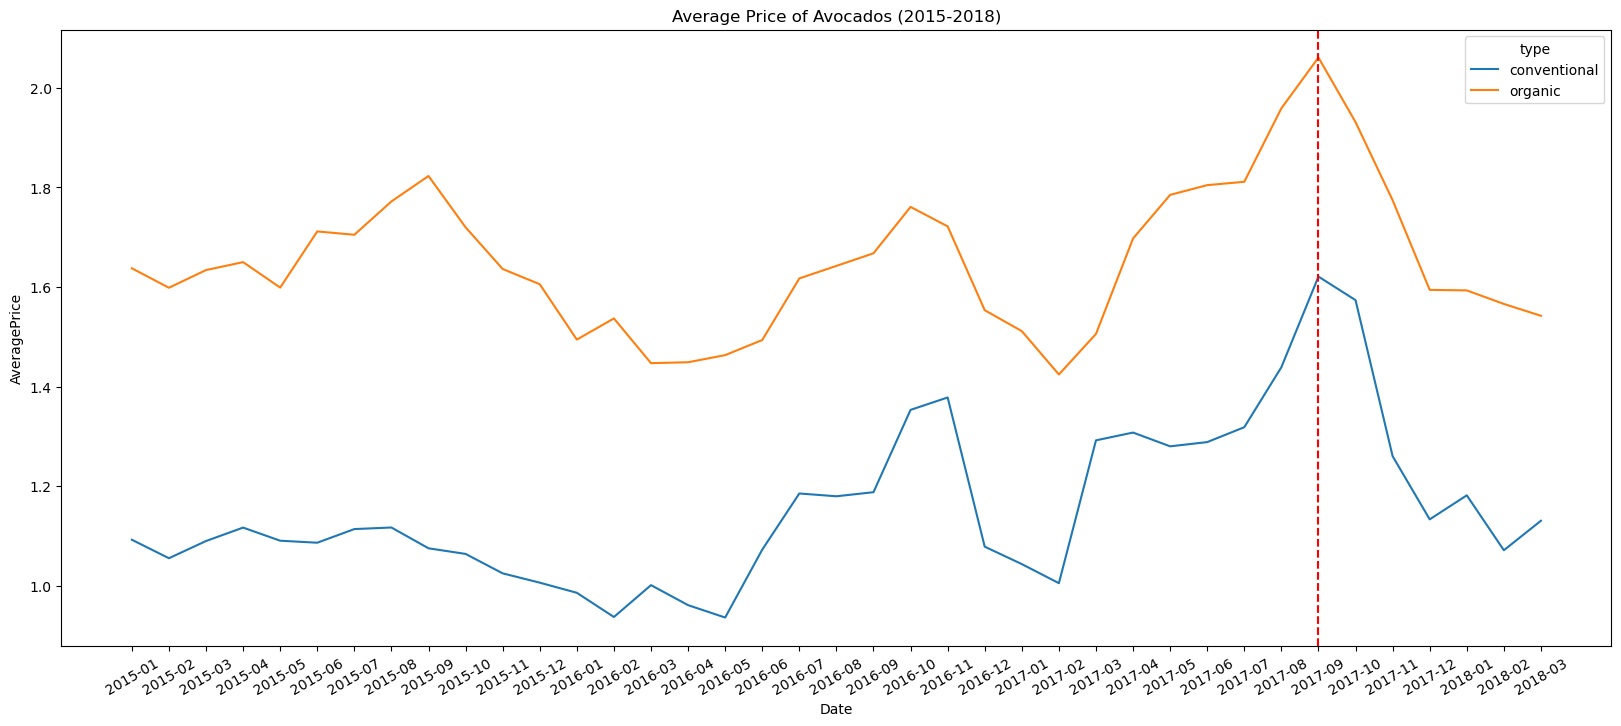

In [60]:
fig2, ax = plt.subplots(1, figsize = (20, 8))
dataset4 = dataset[['Date', 'AveragePrice', 'type']].copy()
dataset4['Date'] = pd.to_datetime(dataset4['Date'])

dataset4['Date'] = dataset4['Date'].apply(lambda x: x.strftime('%Y-%m'))
group1 = dataset4.groupby(['Date', 'type'])
month_avg = pd.DataFrame(group1.aggregate({'AveragePrice': np.mean})).reset_index()

fig = sns.lineplot(x='Date', y='AveragePrice', hue ='type', data=month_avg)
highest_index = month_avg["AveragePrice"].idxmax()
fig.axvline(x = month_avg.loc[highest_index,"Date"], ymin=0, ymax=month_avg.loc[highest_index,"AveragePrice"], linestyle='dashed', color='red')


plt.xticks(rotation=30)
plt.title('Average Price of Avocados (2015-2018)')
plt.show()

- Organic avocados: Based on the price changes throughout time we can see that they are more expensive.
- Conventional avocados: Based on price changes throughout time we can see that they are less expensive
- Both type reach the highest average price on 09-2017 

Text(0.5, 1.0, 'Distribution of Average Avocado Prices by Region')

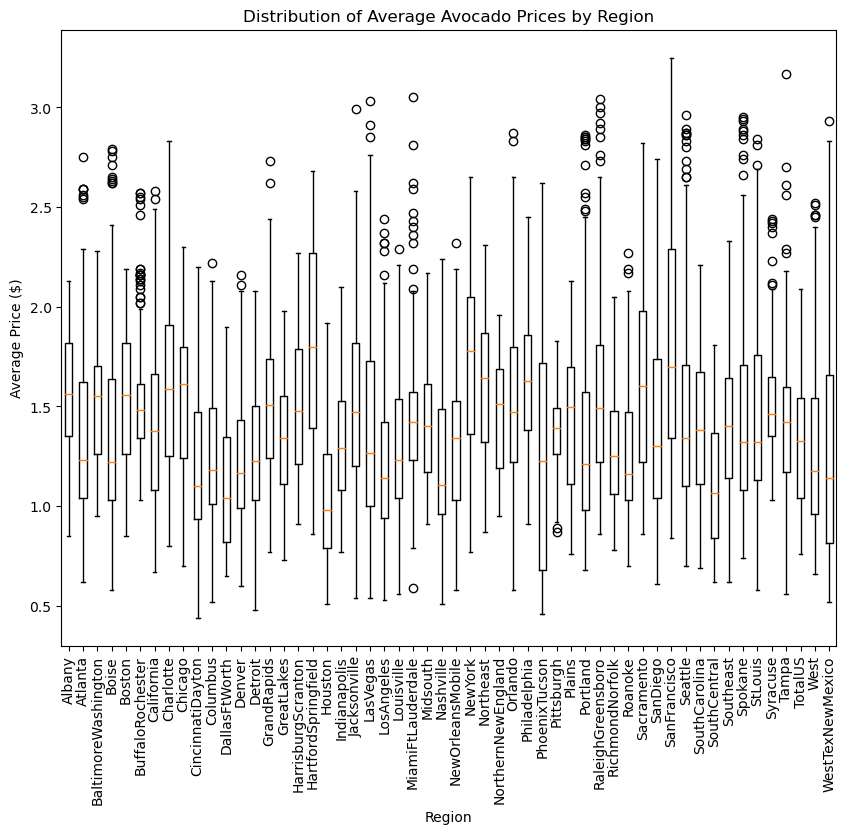

In [14]:
# Box plot of average price by region
plt.figure(figsize=(10, 8))
plt.boxplot([dataset[dataset['region']==r]['AveragePrice'] for r in dataset['region'].unique()])
plt.xticks(range(1, len(dataset['region'].unique())+1), dataset['region'].unique(), rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.title('Distribution of Average Avocado Prices by Region')

In SanFrancisco, the avocado price was very expensive which is the only State in US have the average price over $3

In [188]:
sum_by_region = dataset.groupby('region').agg({'Total Volume': 'sum'}).reset_index()
mean_total_volume = sum_by_region['Total Volume'].mean()
sum_by_region.drop(labels=51, axis=0, inplace=True)

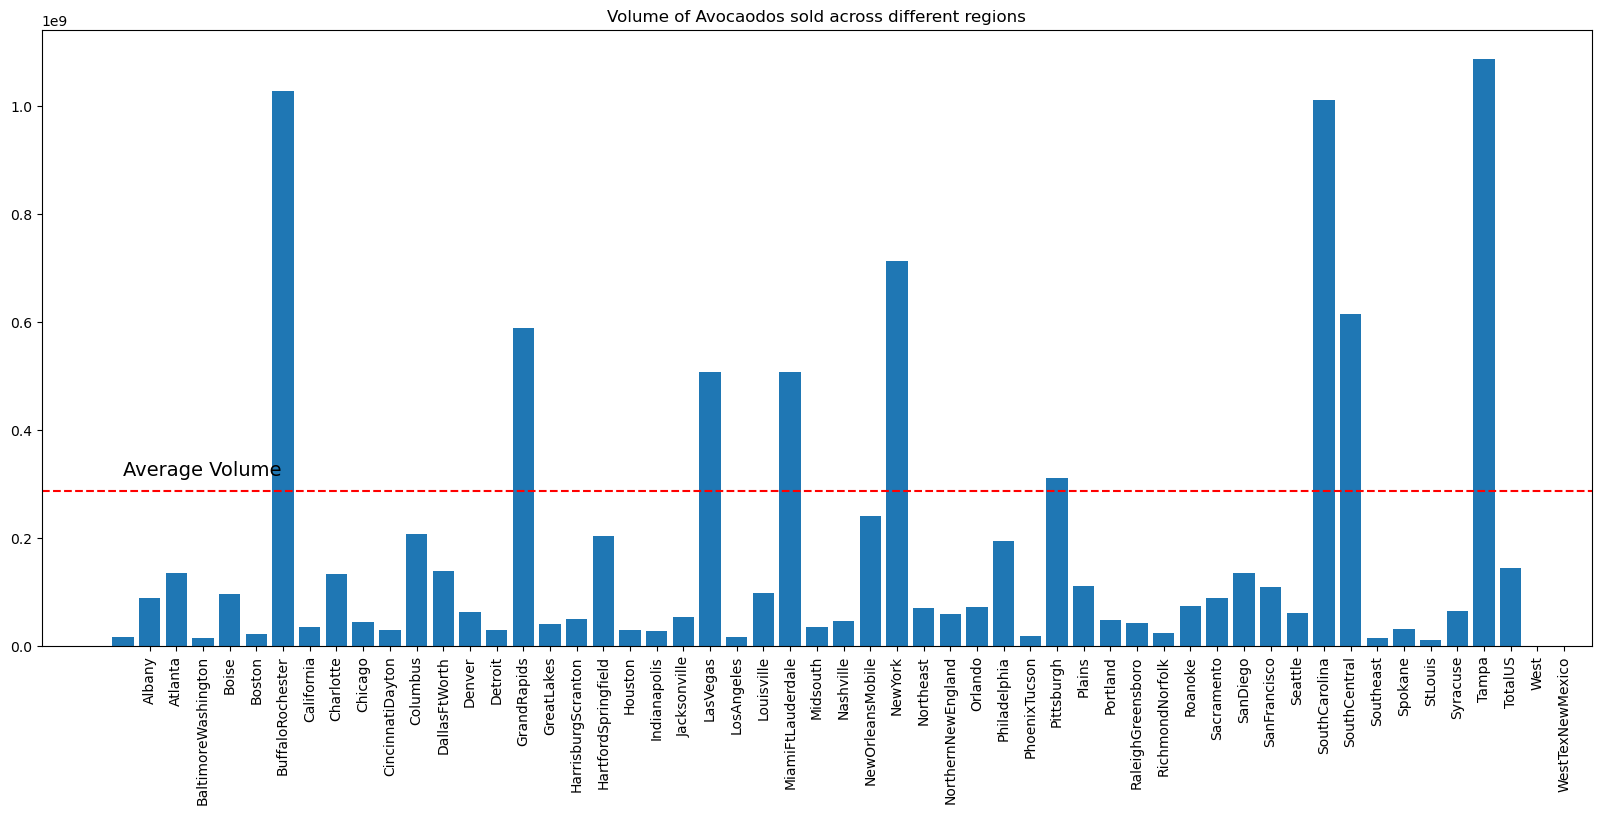

In [191]:
fig, ax = plt.subplots(1, figsize = (20, 8))

fig = plt.bar(x=sum_by_region['region'], height=sum_by_region['Total Volume'])
fig = plt.axhline(y = mean_total_volume, linestyle='dashed', color='red')

plt.annotate(text='Average Volume', xy=(0, mean_total_volume*1.1), fontsize = 14)
plt.xticks(range(1, len(dataset['region'].unique())+1), dataset['region'].unique(), rotation=90)
plt.title('Volume of Avocaodos sold across different regions')
plt.show()

Most of the State consumed avocados lower than the average volume

In [175]:
# Group the data by 'region' and calculate the sum of 'Total_Volume'
sum_by_region = dataset.groupby('region').agg({'Total Volume': 'sum'}).reset_index()
mean_total_volume = sum_by_region['Total Volume'].mean()
sum_by_region.drop(labels=51, axis=0, inplace=True)


# Create a bar chart with Plotly Express
fig = px.bar(sum_by_region, x='region', y='Total Volume', title="Volume of Avocaodos sold across different regions", color="Total Volume")

# Add a horizontal line for the mean of the 'Total_Volume' column
fig.add_shape(
    type='line',
    yref='y', xref='paper',
    y0=mean_total_volume, y1=mean_total_volume,
    x0=0, x1=1,
    line=dict(color='red', width=2, dash='dash')
)

fig.add_annotation(
    x=0, y=mean_total_volume*1.1 ,
    xref='paper', yref='y',
    text='Average Volume',
    showarrow=False,
    font=dict(size=10, color='red')
)

# Set the y-axis label
fig.update_yaxes(title_text='Total Volume')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(width=1.5, color='black')))
# Show the plot
fig.show()